In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('cancer.csv')

In [5]:
x = dataset.drop(columns='diagnosis(1=m, 0=b)')

In [4]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
y = dataset['diagnosis(1=m, 0=b)']

In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis(1=m, 0=b), Length: 569, dtype: int64

## SEPARO LOS DATOS

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## CREO LA RED NEURONAL

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#TensorFlow es una biblioteca de código abierto desarrollada por Google que se
# utiliza para implementar y entrenar modelos de aprendizaje profundo, también 
#conocido como inteligencia artificial. Fue diseñado para facilitar la 
#implementación de algoritmos de aprendizaje automático y aprendizaje profundo,
# especialmente en tareas como reconocimiento de patrones, procesamiento de 
#lenguaje natural, visión por computadora y más.



2024-01-22 20:01:10.837854: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
modelo = Sequential([
    Dense(24, activation='relu'),
    Dense(48, activation='relu'),
    Dense(84, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = modelo.fit(x_train, y_train, epochs=100, verbose=1)#verbose nivel de detalle en  el output


Epoch 1/100
15/15 [==============================] - 2s 3ms/step - loss: 4.0583 - accuracy: 0.6022
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.8681
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2899 - accuracy: 0.9143
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2897 - accuracy: 0.8835
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2319 - accuracy: 0.9121
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2890 - accuracy: 0.9209
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2382 - accuracy: 0.9165
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2012 - accuracy: 0.9187
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5341 - accuracy: 0.8242
Epoch 10/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.9165
Epoch 11/

In [20]:
modelo.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2822 - accuracy: 0.8860


[0.28222087025642395, 0.8859649300575256]

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [13]:
import matplotlib.pyplot as plt

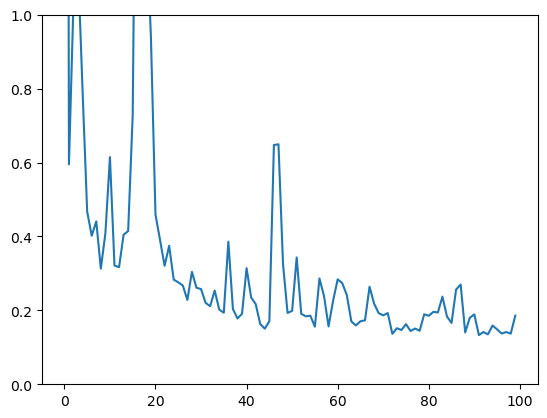

In [18]:
plt.plot(history.history['loss'])
plt.ylim(0,1)
plt.show()